In [1]:
from google.colab import files
iris=files.upload()

Saving iris (4).csv to iris (4).csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier

In [3]:
df1=pd.read_csv("iris (4).csv")
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
X = df1.drop('species', axis=1)
y = df1['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
default_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with default n_estimators (10): {default_accuracy}")

best_accuracy = 0
best_n_estimators = 0
for n_estimators in range(1, 101):
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

print(f"\nBest accuracy: {best_accuracy} achieved with n_estimators = {best_n_estimators}")

Accuracy with default n_estimators (10): 1.0

Best accuracy: 1.0 achieved with n_estimators = 15


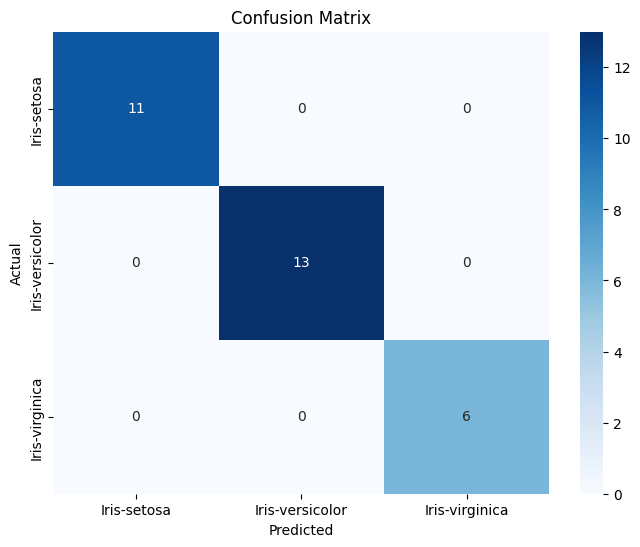

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()